In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from rcparams import update_style

data = pd.read_csv('../rbm_results-permutation.csv', index_col=0)

data['total_items_permutated'] = data['y'].str.split(',').str.len()
data.head()

,fold,metric,missing,value,y,total_items_permutated
0,0,permutations,set(),0.775982,"{0, 1}",2
1,0,permutations,set(),0.879908,"{0, 2}",2
2,0,permutations,set(),0.933025,"{0, 3}",2
3,0,permutations,set(),0.967667,"{0, 4}",2
4,0,permutations,set(),0.974596,"{0, 5}",2


In [2]:
df = data.groupby(['total_items_permutated'])['value'].agg(["mean", "std"])
df.to_csv('output/plugins-positioning.csv')
df

,mean,std
total_items_permutated,,
2,0.897795,0.072441
3,0.818628,0.069475
4,0.752232,0.060185
5,0.693879,0.046010
6,0.637208,0.012534


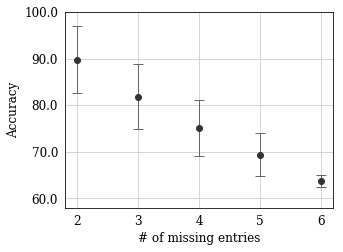

In [3]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

from itertools import combinations

update_style()

plt.figure(figsize=(8*.6, 6*.6))

plt.errorbar(y=df['mean'], x=df.index, yerr=df['std'], fmt='o', color="#333333", ecolor='#666666', capsize=5, elinewidth=1, markeredgewidth=1)
plt.xlim([1.8, 6.2])
plt.ylim([.58, 1])

#plt.gca().set_xlabel('Número de posições a serem ordenadas')
plt.gca().set_xlabel('# of missing entries')
#plt.gca().set_ylabel('Acurácia')
plt.gca().set_ylabel('Accuracy')
plt.gca().set_yticklabels(['{:3.1f}'.format(x*100) for x in plt.gca().get_yticks()])

plt.gca().get_figure().savefig("output/permutations.pdf", bbox_inches='tight')